# **Proyecto Final Data Science III**
# "Análisis de Reseñas de Clientes de Starbucks mediante Técnicas de Procesamiento de Lenguaje Natural "

### **Alumna:** Wasserman Alejandra
### **Institución:** Coderhouse
### **Comisión:** 95480
### **Dataset:** Starbucks
### **Fuente:**
* **Link:** https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset

# Abstract

El presente trabajo tiene como objetivo aplicar técnicas de procesamiento de lenguaje natural (NLP) sobre un conjunto de reseñas de clientes de Starbucks. El dataset utilizado contiene comentarios textuales que reflejan percepciones, opiniones y valoraciones de los consumidores respecto a la marca y sus productos.

A través del preprocesamiento de texto —incluyendo tokenización, lematización y eliminación de stopwords— se busca limpiar y estructurar los datos de manera adecuada para futuros análisis. Posteriormente, se incorporan técnicas de análisis de sentimiento y representación vectorial mediante TF-IDF, junto con el análisis de frecuencia de palabras y la exploración lingüística con SpaCy.

Este proceso permitirá no solo comprender mejor las opiniones de los clientes, sino también identificar las palabras más representativas y asociarlas a las polaridades del sentimiento expresado, así como analizar la relación entre las reseñas textuales y los ratings otorgados. De esta manera, se sientan las bases para aplicaciones más avanzadas como minería de opiniones, clasificación automática de reseñas y sistemas de recomendación.

# Introducción

En la actualidad, las reseñas de clientes constituyen una fuente de información clave para las empresas, ya que reflejan percepciones directas sobre la calidad de los productos y servicios. Sin embargo, estos datos suelen encontrarse en formato de texto no estructurado, lo que dificulta su análisis automatizado.

El Procesamiento de Lenguaje Natural (NLP) se presenta como una solución para transformar dichos textos en información valiosa. A través de técnicas de preprocesamiento, es posible limpiar, normalizar y estructurar los datos para facilitar su posterior análisis.

En este proyecto, se utiliza un dataset de reseñas de Starbucks con el fin de aplicar distintas etapas de preprocesamiento de texto. Estas tareas incluyen tokenización, lematización y eliminación de stopwords. A partir de este corpus normalizado, se realizan análisis complementarios:

TF-IDF y Bag of Words para identificar las palabras más representativas y frecuentes.

Análisis de sentimiento (VADER) para clasificar reseñas como positivas, negativas o neutras, comparando polaridad textual con ratings otorgados.

Exploración con spaCy para extraer información gramatical y semántica, centrándose en sustantivos y adjetivos que caracterizan reseñas positivas y negativas.

De esta forma, se busca obtener una representación más clara del contenido textual y generar conocimientos aplicables en la gestión de la experiencia del cliente.

# Objetivos

**Objetivo general**

Aplicar técnicas de preprocesamiento y análisis de NLP a un conjunto de reseñas de clientes de Starbucks para obtener un corpus limpio y normalizado que permita extraer información relevante sobre patrones de lenguaje, polaridad de sentimientos y relación con los ratings.

**Objetivos específicos**

* Cargar y explorar el dataset de reseñas de Starbucks.

* Implementar procesos de tokenización, lematización y remoción de stopwords.

* Realizar un análisis de frecuencia de palabras con Bag of Words.

* Aplicar el modelo TF-IDF para identificar las palabras más representativas del corpus.

* Desarrollar un análisis de sentimiento con VADER, clasificando reseñas en positivas, negativas y neutras.

* Comparar la distribución de sentimientos con los ratings asignados.

* Utilizar spaCy para extraer sustantivos y adjetivos más frecuentes en reseñas positivas y negativas.

* Evaluar los resultados a través de visualizaciones y tablas comparativas.

# Hipótesis

* **Hipótesis 1**: La aplicación de técnicas de preprocesamiento de texto (tokenización, lematización y remoción de stopwords) permitirá obtener un corpus más uniforme, reduciendo redundancias y mejorando la representación semántica del contenido.

* **Hipótesis 2**: El uso de TF-IDF y análisis de frecuencia permitirá identificar las palabras más relevantes y características de las reseñas, diferenciando patrones entre comentarios positivos y negativos.

* **Hipótesis 3**: El análisis de sentimiento con VADER mostrará correspondencia con los ratings otorgados por los clientes, confirmando que las reseñas con baja puntuación presentan un mayor número de palabras con polaridad negativa.

* **Hipótesis 4**: La aplicación de SpaCy permitirá identificar sustantivos y adjetivos clave que reflejan percepciones específicas de los consumidores, aportando un nivel adicional de interpretación semántica.

# Dataset

Este conjunto de datos contiene una colección completa de reseñas y valoraciones de consumidores sobre Starbucks, una reconocida cadena de cafeterías. Los datos recopilados incluyen reseñas textuales, valoraciones con estrellas, información de ubicación y enlaces a imágenes. Ofrece información valiosa sobre las opiniones y comentarios de los clientes sobre las ubicaciones de Starbucks.

El dataset cuenta con 850 registros y 6 columnas.

Contenido:

* `Name`: El nombre del autor de la reseña.
* `Location`: La ubicación o ciudad asociada al consumidor.
* `Date`: La fecha en que se publicó la reseña.
* `Rating`: La calificación de estrellas otorgada por el consumidor, del 1 al 5.
* `Review`: El contenido textual de la reseña, que refleja la experiencia y las opiniones del consumidor.
* `Image Links`: Enlaces a imágenes asociadas con las reseñas.

# Importación de librerías

In [272]:
import numpy as np
import pandas as pd
import re
import string
import os
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargas NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')

# Warning
import warnings
warnings.filterwarnings("ignore")

print('Librerías cargadas correctamente')

Librerías cargadas correctamente


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader

In [273]:
# Instalación de SpaCy y el modelo de lenguaje en inglés mediano.
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 48.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Carga y revisión del dataset

In [274]:
# Dataset
!gdown 1MD6d1kUXVRH_LQkjhPoJQAMpz_EZZyxy

Downloading...
From: https://drive.google.com/uc?id=1MD6d1kUXVRH_LQkjhPoJQAMpz_EZZyxy
To: /content/Starbucks_reviews_data.csv
100% 465k/465k [00:00<00:00, 83.8MB/s]


In [275]:
df = pd.read_csv('Starbucks_reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [276]:
df.shape

(850, 6)

In [277]:
df.columns.tolist()

['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links']

# Exploración y limpieza

In [278]:
# Valores faltantes
df.isna().sum()

,0
name,0
location,0
Date,0
Rating,145
Review,0
Image_Links,0


In [279]:
df[df['Review'] == 'No Review Text']

,name,location,Date,Rating,Review,Image_Links
62,Sharon,"Culpeper, VA","Reviewed July 18, 2022",2.0,No Review Text,['No Images']
100,Donald,"Orlando, FL","Reviewed Nov. 22, 2021",1.0,No Review Text,['No Images']
793,Maureen,"Lakewood, WA","Reviewed March 25, 2009",NaN,No Review Text,['No Images']
794,Maryellen,"Richmond, TX","Reviewed March 23, 2009",NaN,No Review Text,['No Images']
795,Ben,"Shanghai, OTHER","Reviewed March 23, 2009",NaN,No Review Text,['No Images']
796,Carla,"Cambridge, MA","Reviewed March 15, 2009",NaN,No Review Text,['No Images']
797,Michelle,"Yorktown, VA","Reviewed March 14, 2009",NaN,No Review Text,['No Images']
798,Katie,"Escondido, CA","Reviewed March 4, 2009",NaN,No Review Text,['No Images']
799,Barry,"Okemos, MI","Reviewed Feb. 26, 2009",NaN,No Review Text,['No Images']
800,Lori,"Chicago, IL","Reviewed Feb. 23, 2009",NaN,No Review Text,['No Images']


In [280]:
# Eliminación de campos sin reseñas
df = df[df['Review'] != 'No Review Text']

In [281]:
# Tratamiento de valores faltantes
df['Rating'] = df['Rating'].fillna(1.0)

In [282]:
df.iloc[:,[3,4]]

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...
841,1.0,"When using my debit card, how much and for how..."
842,1.0,I just bought a starbucks thermos mug about a ...
844,1.0,I'm (was) a regular customer who ordered a lat...
845,1.0,I ordered two venti frappacino's without whipp...


In [283]:
print("Distribución de los Ratings:")
df['Rating'].value_counts()

Distribución de los Ratings:


,count
Rating,
1.0,560
2.0,98
5.0,83
4.0,39
3.0,33


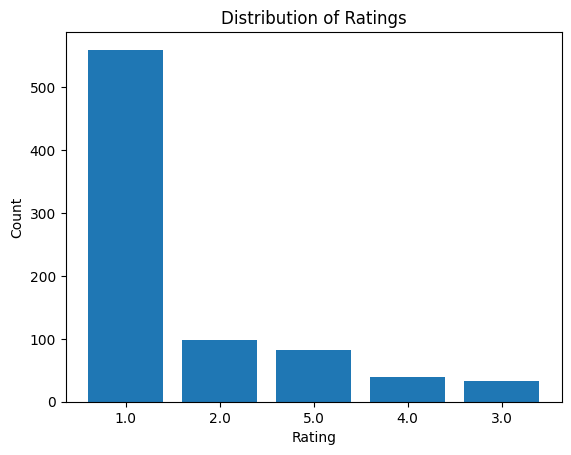

In [284]:
# Convertir 'Rating' en numérica
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Convertir la columna al tipo de cadena para obtener un gráfico consistente
df['Rating'] = df['Rating'].astype(str)

# Visualización de la distribución
rating_counts = df['Rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

Observación: Las clases se presentan muy desbalanceadas

In [285]:
# Selección de una reseña como ejemplo
review_text = df['Review'].iloc[15]
print("Texto Original:\n", review_text)

# Función para la limpieza del texto
def clean_text_regex(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    # 3. Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # 4. Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 5. Eliminar números
    text = re.sub(r'\d+', '', text)
    # 6. Eliminar espacios en blanco extra
    text = re.sub(r'\s+', ' ', text).strip()
    return text

clean_review = clean_text_regex(review_text)
print("\nTexto Limpio con REGEX:\n", clean_review)

Texto Original:
 My mother sent me a $15 gift card purchased from Walgreens in June. She came to visit me this past weekend and brought the Gift card receipts. I contacted Walgreens to replace the cards. I was told to contact the Merchant (Starbucks). I called Starbucks and spoke with a representative today, explained my problem. He asked for the card number. When I provided it, he transferred me to a different department that handles these issues. I got another representative. I told this representative why I was transferred over. She got silent and ended the call. It is like no one wants to handle issues or do their job. 

Texto Limpio con REGEX:
 my mother sent me a gift card purchased from walgreens in june she came to visit me this past weekend and brought the gift card receipts i contacted walgreens to replace the cards i was told to contact the merchant starbucks i called starbucks and spoke with a representative today explained my problem he asked for the card number when i pro

In [286]:
# Aplicación de la limpieza a todas las reseñas

df['cleaned_review'] = df['Review'].apply(clean_text_regex)

df[['Review', 'cleaned_review']].head(8)

,Review,cleaned_review
0,Amber and LaDonna at the Starbucks on Southwes...,amber and ladonna at the starbucks on southwes...
1,** at the Starbucks by the fire station on 436...,at the starbucks by the fire station on in alt...
2,I just wanted to go out of my way to recognize...,i just wanted to go out of my way to recognize...
3,Me and my friend were at Starbucks and my card...,me and my friend were at starbucks and my card...
4,I’m on this kick of drinking 5 cups of warm wa...,i’m on this kick of drinking cups of warm wate...
5,We had to correct them on our order 3 times. T...,we had to correct them on our order times they...
6,I have tried Starbucks several different times...,i have tried starbucks several different times...
7,Starbucks near me just launched new fall foods...,starbucks near me just launched new fall foods...


# Análisis de las reseñas

## Tokenización

In [287]:
# Definición de la variable
cleaned_review = df['cleaned_review'].iloc[4]
print("Texto Limpio:\n", cleaned_review)

Texto Limpio:
 i’m on this kick of drinking cups of warm water i work for instacart right now and every location of starbucks i was given free hot water because i asked for it without being charged i really appreciate starbucks for giving me the opportunity to do such thing that’s why i give them five stars they fully have my support they’re super nice and professional and the coffee is great go to starbucks


In [288]:
# Tokenización en palabras
words = word_tokenize(cleaned_review)
print("\nTokenización de Palabras:\n", words)


Tokenización de Palabras:
 ['i', '’', 'm', 'on', 'this', 'kick', 'of', 'drinking', 'cups', 'of', 'warm', 'water', 'i', 'work', 'for', 'instacart', 'right', 'now', 'and', 'every', 'location', 'of', 'starbucks', 'i', 'was', 'given', 'free', 'hot', 'water', 'because', 'i', 'asked', 'for', 'it', 'without', 'being', 'charged', 'i', 'really', 'appreciate', 'starbucks', 'for', 'giving', 'me', 'the', 'opportunity', 'to', 'do', 'such', 'thing', 'that', '’', 's', 'why', 'i', 'give', 'them', 'five', 'stars', 'they', 'fully', 'have', 'my', 'support', 'they', '’', 're', 'super', 'nice', 'and', 'professional', 'and', 'the', 'coffee', 'is', 'great', 'go', 'to', 'starbucks']


In [289]:
# Definir una función para tokenizar todas las reseñas
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tokens'] = df['cleaned_review'].apply(tokenize)

df[['cleaned_review', 'tokens']].head(6)

,cleaned_review,tokens
0,amber and ladonna at the starbucks on southwes...,"[amber, and, ladonna, at, the, starbucks, on, ..."
1,at the starbucks by the fire station on in alt...,"[at, the, starbucks, by, the, fire, station, o..."
2,i just wanted to go out of my way to recognize...,"[i, just, wanted, to, go, out, of, my, way, to..."
3,me and my friend were at starbucks and my card...,"[me, and, my, friend, were, at, starbucks, and..."
4,i’m on this kick of drinking cups of warm wate...,"[i, ’, m, on, this, kick, of, drinking, cups, ..."
5,we had to correct them on our order times they...,"[we, had, to, correct, them, on, our, order, t..."


## Eliminación de Stopwords

In [290]:
# Obtención de la lista de stop words en inglés
stop_words = set(stopwords.words('english'))

print("Algunas Stop Words en inglés:\n", list(stop_words)[:10])

print('Cantidad Stop Words:', len(stop_words))

Algunas Stop Words en inglés:
 ['after', "that'll", 'some', 'these', "didn't", 'or', 'own', 'same', "you'd", 'other']
Cantidad Stop Words: 198


In [291]:
# Filtración de las stop words de la lista de palabras tokenizadas
filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

In [292]:
print("\nPalabras después de eliminar Stop Words:\n", filtered_words)


Palabras después de eliminar Stop Words:
 ['kick', 'drinking', 'cups', 'warm', 'water', 'work', 'instacart', 'right', 'every', 'location', 'starbucks', 'given', 'free', 'hot', 'water', 'asked', 'without', 'charged', 'really', 'appreciate', 'starbucks', 'giving', 'opportunity', 'thing', 'give', 'five', 'stars', 'fully', 'support', 'super', 'nice', 'professional', 'coffee', 'great', 'go', 'starbucks']


In [293]:
# Remoción de stopwords de todas las reseñas
# Eliminación de palabras vacías y tokens de longitud 1

all_stopwords = set(stopwords.words('english'))

if 'tokens' in df.columns:
    df['tokens_cleaned'] = df['tokens'].apply(lambda toks: [t for t in toks if t not in all_stopwords and len(t) > 1])
    display(df[['tokens', 'tokens_cleaned']].head(6))

,tokens,tokens_cleaned
0,"[amber, and, ladonna, at, the, starbucks, on, ...","[amber, ladonna, starbucks, southwest, parkway..."
1,"[at, the, starbucks, by, the, fire, station, o...","[starbucks, fire, station, altamonte, springs,..."
2,"[i, just, wanted, to, go, out, of, my, way, to...","[wanted, go, way, recognize, starbucks, employ..."
3,"[me, and, my, friend, were, at, starbucks, and...","[friend, starbucks, card, work, thankful, work..."
4,"[i, ’, m, on, this, kick, of, drinking, cups, ...","[kick, drinking, cups, warm, water, work, inst..."
5,"[we, had, to, correct, them, on, our, order, t...","[correct, order, times, never, got, right, man..."


## Lematización

In [294]:
# Lematización de la reseña ejemplo

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Palabras Originales:\n", filtered_words)
print("\nPalabras con Lematización:\n", lemmatized_words)

Palabras Originales:
 ['kick', 'drinking', 'cups', 'warm', 'water', 'work', 'instacart', 'right', 'every', 'location', 'starbucks', 'given', 'free', 'hot', 'water', 'asked', 'without', 'charged', 'really', 'appreciate', 'starbucks', 'giving', 'opportunity', 'thing', 'give', 'five', 'stars', 'fully', 'support', 'super', 'nice', 'professional', 'coffee', 'great', 'go', 'starbucks']

Palabras con Lematización:
 ['kick', 'drinking', 'cup', 'warm', 'water', 'work', 'instacart', 'right', 'every', 'location', 'starbucks', 'given', 'free', 'hot', 'water', 'asked', 'without', 'charged', 'really', 'appreciate', 'starbucks', 'giving', 'opportunity', 'thing', 'give', 'five', 'star', 'fully', 'support', 'super', 'nice', 'professional', 'coffee', 'great', 'go', 'starbucks']


In [295]:
# Definición de una función para lematizar todas las reseñas

def nltk_wordnet(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_tokens(tokens):
    if not tokens:
        return []
    pos_tags = pos_tag(tokens)
    lemmas = [lemmatizer.lemmatize(token, nltk_wordnet(pos)) for token, pos in pos_tags]
    return lemmas

if 'tokens_cleaned' in df.columns:
    df['tokens_lemma'] = df['tokens_cleaned'].apply(lemmatize_tokens)

df[['tokens_cleaned', 'tokens_lemma']].head(8)

,tokens_cleaned,tokens_lemma
0,"[amber, ladonna, starbucks, southwest, parkway...","[amber, ladonna, starbucks, southwest, parkway..."
1,"[starbucks, fire, station, altamonte, springs,...","[starbucks, fire, station, altamonte, spring, ..."
2,"[wanted, go, way, recognize, starbucks, employ...","[want, go, way, recognize, starbucks, employee..."
3,"[friend, starbucks, card, work, thankful, work...","[friend, starbucks, card, work, thankful, work..."
4,"[kick, drinking, cups, warm, water, work, inst...","[kick, drinking, cup, warm, water, work, insta..."
5,"[correct, order, times, never, got, right, man...","[correct, order, time, never, get, right, mana..."
6,"[tried, starbucks, several, different, times, ...","[tried, starbucks, several, different, time, d..."
7,"[starbucks, near, launched, new, fall, foods, ...","[starbucks, near, launch, new, fall, food, bev..."


### Wordcloud

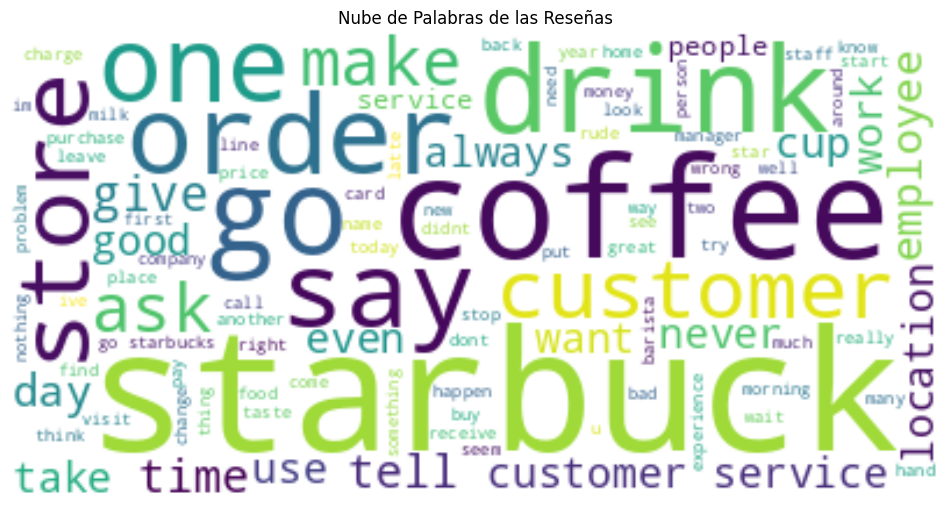

In [296]:
# Iterar a través de las listas de tokens y unirlas en una sola cadena

text_corpus = " ".join([" ".join(tokens) for tokens in df['tokens_lemma'].dropna()])

# Generación de la nube de palabras
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(text_corpus)

# Obtención de la imagen
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de las Reseñas")
plt.show()

## TF-IDF con Lematización

In [297]:
# Utilización de los textos lematizados
texts = df['tokens_lemma'].dropna().astype(str).tolist()

# Iniciar TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(texts)

# Conversión a DataFrame para ver las palabras más importantes
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head(10)

,able,absolutely,accept,access,accidentally,accommodate,account,acknowledge,across,act,...,write,wrong,year,yell,yes,yesterday,yet,york,young,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.180201,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.104222,0.0,0.0,0.325984,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.414747,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [298]:
# Vocabulario
print("\nVocabulario (TF-IDF):\n", tfidf.get_feature_names_out())

# Matriz TF-IDF
print("\nMatriz TF-IDF:\n", X_tfidf.toarray().round(2))


Vocabulario (TF-IDF):
 ['able' 'absolutely' 'accept' 'access' 'accidentally' 'accommodate'
 'account' 'acknowledge' 'across' 'act' 'action' 'actually' 'add'
 'address' 'advantage' 'advise' 'afternoon' 'ago' 'agree' 'air' 'airport'
 'allow' 'almost' 'along' 'already' 'also' 'although' 'always' 'amaze'
 'ambiance' 'americano' 'amount' 'angry' 'annoy' 'another' 'answer'
 'anymore' 'anyone' 'anything' 'anywhere' 'apologize' 'apology' 'app'
 'apparently' 'appeal' 'apple' 'appreciate' 'approach' 'approx'
 'approximately' 'april' 'area' 'around' 'arrive' 'ask' 'associate'
 'assume' 'atmosphere' 'attempt' 'attention' 'attitude' 'august'
 'available' 'ave' 'avoid' 'away' 'awesome' 'awful' 'back' 'bacon' 'bad'
 'bag' 'bagel' 'balance' 'bank' 'barista' 'baristas' 'base' 'basically'
 'basis' 'bathroom' 'beach' 'bean' 'become' 'begin' 'behavior' 'behind'
 'believe' 'benefit' 'best' 'beverage' 'big' 'bill' 'birthday' 'bit'
 'bite' 'bitter' 'black' 'blend' 'blender' 'blueberry' 'blvd' 'bonus'
 'book

## Bag of Words con CountVectorizer

In [299]:
# Muestra de 5 reseñas para visualizar
sample_reviews = df['Review'].head(5).tolist()

In [300]:
# Aplicación de la función de limpieza a cada reseña
cleaned_sample = [clean_text_regex(review) for review in sample_reviews]
print("Reseñas limpias de muestra:\n")
for i, review in enumerate(cleaned_sample):
    print(f"{i+1}: {review}")

Reseñas limpias de muestra:

1: amber and ladonna at the starbucks on southwest parkway are always so warm and welcoming there is always a smile in their voice when they greet you at the drivethru and their customer service is always spoton they always get my order right and with a smile i would actually give them more than stars if they were available
2: at the starbucks by the fire station on in altamonte springs fl made my day and finally helped me figure out the way to make my drink so i’d love it she took time out to talk to me for minutes to make my experience better than what i’m used to it was much appreciated i’ve had bad experiences one after another at the starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas niko was refreshing to speak to and pleasant the drink was perfect store
3: i just wanted to go out of my way to recognize a starbucks employee billy at the franklin park location i

In [301]:
# Inicialización del vectorizador
bow_vectorizer = CountVectorizer()

In [302]:
# Ajuste del vectorizador al texto, donde aprende el vocabulario, y transformación en una matriz
bow_matrix = bow_vectorizer.fit_transform(cleaned_sample)

In [303]:
# Vocabulario creado
print("\nVocabulario (Bag of Words):\n", bow_vectorizer.get_feature_names_out())


Vocabulario (Bag of Words):
 ['about' 'actually' 'after' 'all' 'along' 'altamonte' 'always' 'amber'
 'an' 'and' 'another' 'appreciate' 'appreciated' 'are' 'asked' 'at'
 'available' 'bad' 'baristas' 'because' 'being' 'better' 'billy' 'bother'
 'building' 'but' 'by' 'card' 'charged' 'closest' 'coffee' 'could' 'cups'
 'customer' 'day' 'did' 'didn' 'dillon' 'do' 'drink' 'drinking' 'drinks'
 'drivethru' 'employee' 'every' 'experience' 'experiences' 'figure'
 'finally' 'fire' 'five' 'fl' 'fool' 'for' 'franklin' 'free' 'friend'
 'from' 'fully' 'get' 'give' 'given' 'giving' 'go' 'great' 'greet' 'had'
 'have' 'having' 'he' 'help' 'helped' 'him' 'hot' 'if' 'in' 'instacart'
 'is' 'it' 'just' 'kick' 'kindness' 'ladonna' 'late' 'like' 'location'
 'look' 'love' 'made' 'make' 'me' 'minutes' 'more' 'morning' 'much' 'my'
 'nice' 'niko' 'not' 'now' 'of' 'on' 'one' 'only' 'opportunity' 'order'
 'other' 'our' 'out' 'paid' 'park' 'parkway' 'people' 'perfect' 'place'
 'placed' 'pleasant' 'professional' 'ra

In [304]:
# Matriz documento-término
print("\nMatriz BoW (Documento-Término):\n", bow_matrix.toarray())


Matriz BoW (Documento-Término):
 [[0 1 0 0 0 0 4 1 0 4 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
  0 0 1 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 1 0 1 0 0 1 0 1 1 0 0 0
  0 0 0 1 0 0 0 0 2 2 1 1 3 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0
  0 0 0 1 0 1]
 [0 0 1 0 1 1 0 0 0 2 1 0 1 0 0 2 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0
  0 0 0 2 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 2 0 1 0 0 0 0 1
  0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 1 1 2 3 1 0 0 1 5 0 1 2 0 0 1 1 0 0 0 0 0
  2 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 2 0 1 1 0
  0 0 1 1 0 0 0 1 5 0 0 0 0 0 0 1 8 1 1 1 0 0 0 0 0 3 0 1 0 0 1 0 0 2 0 0
  1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0
  0 0 0 0 0 0 1 2 0 0 0 1 1 2 0 0 1 2 0 0 0 1 1 

### Parámetros importantes de CountVectorizer

In [305]:
# Más parámetros
bow_vectorizer_adv = CountVectorizer(stop_words='english', max_features=20)

# Ajuste y transformación
bow_matrix_adv = bow_vectorizer_adv.fit_transform(cleaned_sample)

print("\nVocabulario con parámetros avanzados (top 20 features, sin stop words):\n", bow_vectorizer_adv.get_feature_names_out())
print("\nMatriz BoW avanzada:\n", bow_matrix_adv.toarray())


Vocabulario con parámetros avanzados (top 20 features, sin stop words):
 ['bad' 'better' 'customer' 'day' 'didn' 'drinks' 'great' 'just' 'like'
 'location' 'make' 'nice' 'order' 'paid' 'service' 'smile' 'starbucks'
 'support' 'thank' 'work']

Matriz BoW avanzada:
 [[0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 2 1 0 0 0]
 [1 1 1 1 0 1 2 0 0 0 2 0 0 0 1 0 2 0 0 1]
 [1 1 0 0 0 0 0 2 1 2 2 0 2 0 0 1 1 0 1 1]
 [0 0 0 1 3 2 0 0 1 0 0 1 0 2 0 0 1 1 1 2]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 3 1 0 1]]


### Capturando Contexto con N-Grams

In [306]:
# Uso de ngram_range=(1, 2) para incluir unigramas y bigramas.
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Ajuste y transformación
ngram_matrix = ngram_vectorizer.fit_transform(cleaned_sample)

# El vocabulario ahora es mayor, ya que incluye palabras y pares de palabras
print("\nVocabulario con Unigramas y Bigramas:\n", ngram_vectorizer.get_feature_names_out())

print("\nMatriz de N-Grams:\n", ngram_matrix.toarray())

print("\nShape de la matriz", ngram_matrix.toarray().shape)


Vocabulario con Unigramas y Bigramas:
 ['about' 'about it' 'actually' 'actually give' 'after' 'after another'
 'all' 'all thanks' 'along' 'along with' 'altamonte' 'altamonte springs'
 'always' 'always get' 'always smile' 'always so' 'always spoton' 'amber'
 'amber and' 'an' 'an order' 'and' 'and every' 'and finally'
 'and kindness' 'and ladonna' 'and my' 'and not' 'and people'
 'and pleasant' 'and professional' 'and the' 'and their' 'and was'
 'and welcoming' 'and with' 'another' 'another at' 'appreciate'
 'appreciate starbucks' 'appreciated' 'appreciated ve' 'are' 'are always'
 'asked' 'asked for' 'at' 'at shoreline' 'at starbucks' 'at the'
 'available' 'bad' 'bad experiences' 'bad morning' 'baristas'
 'baristas niko' 'because' 'because asked' 'because my' 'being'
 'being charged' 'being great' 'better' 'better place' 'better than'
 'billy' 'billy at' 'bother' 'bother him' 'building' 'building with' 'but'
 'but made' 'but other' 'by' 'by the' 'card' 'card didn' 'charged'
 'charged re

## TF-IDF con N-Grams

In [307]:
# Uso de las reseñas de muestra
print("Reseñas limpias de muestra:\n")
for i, review in enumerate(cleaned_sample):
    print(f"{i+1}: {review}")

# Inicialización del vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

# Ajustey transformación del texto
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_sample)

# Vocabulario (será el mismo que con n-grams, pero filtrado por stop words)
print("\nVocabulario (TF-IDF con N-Grams):\n", tfidf_vectorizer.get_feature_names_out())

# Matriz TF-IDF
print("\nMatriz TF-IDF:\n", tfidf_matrix.toarray().round(2))

Reseñas limpias de muestra:

1: amber and ladonna at the starbucks on southwest parkway are always so warm and welcoming there is always a smile in their voice when they greet you at the drivethru and their customer service is always spoton they always get my order right and with a smile i would actually give them more than stars if they were available
2: at the starbucks by the fire station on in altamonte springs fl made my day and finally helped me figure out the way to make my drink so i’d love it she took time out to talk to me for minutes to make my experience better than what i’m used to it was much appreciated i’ve had bad experiences one after another at the starbucks that’s closest to me in my work building with my drinks not being great along with not great customer service from specific baristas niko was refreshing to speak to and pleasant the drink was perfect store
3: i just wanted to go out of my way to recognize a starbucks employee billy at the franklin park location i

## Comparación BoW y TF-ITF

In [308]:
# TF-ITF con Lematización
# Cálculo de la media de los pesos de cada palabra en todo el corpus
tfidf_means = np.mean(X_tfidf.toarray(), axis=0)

# Orden de mayor a menor
top_indices = tfidf_means.argsort()[::-1][:20]

# Selección de las palabras y sus valores
top_words = [(tfidf.get_feature_names_out()[i], tfidf_means[i]) for i in top_indices]

top_words_df = pd.DataFrame(top_words, columns=['palabra', 'peso_tfidf'])
print(top_words_df)

      palabra  peso_tfidf
0   starbucks    0.061792
1      coffee    0.054910
2          go    0.043391
3         get    0.041295
4       drink    0.040366
5       order    0.039131
6    customer    0.038377
7        time    0.032754
8       store    0.032560
9     service    0.029926
10        one    0.029679
11        say    0.028968
12       card    0.027155
13       make    0.026783
14       like    0.026306
15        ask    0.024304
16       give    0.023112
17        cup    0.021807
18   employee    0.021571
19      would    0.021495


In [309]:
# TF-IDF con N-Grams
# Cálculo de la media de los pesos de cada palabra en todo el corpus
tfidf_means1 = np.mean(tfidf_matrix.toarray(), axis=0)

# Orden de mayor a menor
top_indices1 = tfidf_means1.argsort()[::-1][:20]

# Selección de las palabras y sus valores
top_words1 = [(tfidf_vectorizer.get_feature_names_out()[i], tfidf_means1[i]) for i in top_indices1]

top_words_df1 = pd.DataFrame(top_words1, columns=['palabra', 'peso_tfidf'])
print(top_words_df1)

        palabra  peso_tfidf
0     starbucks    0.096274
1          make    0.074637
2         smile    0.073174
3          didn    0.067783
4          work    0.066197
5         order    0.066099
6      location    0.060372
7         great    0.056309
8        drinks    0.054101
9         water    0.052112
10         just    0.048773
11         warm    0.047772
12        stars    0.047772
13        right    0.047772
14    card didn    0.045188
15         card    0.045188
16       dillon    0.045188
17    didn work    0.045188
18         paid    0.045188
19  paid drinks    0.045188


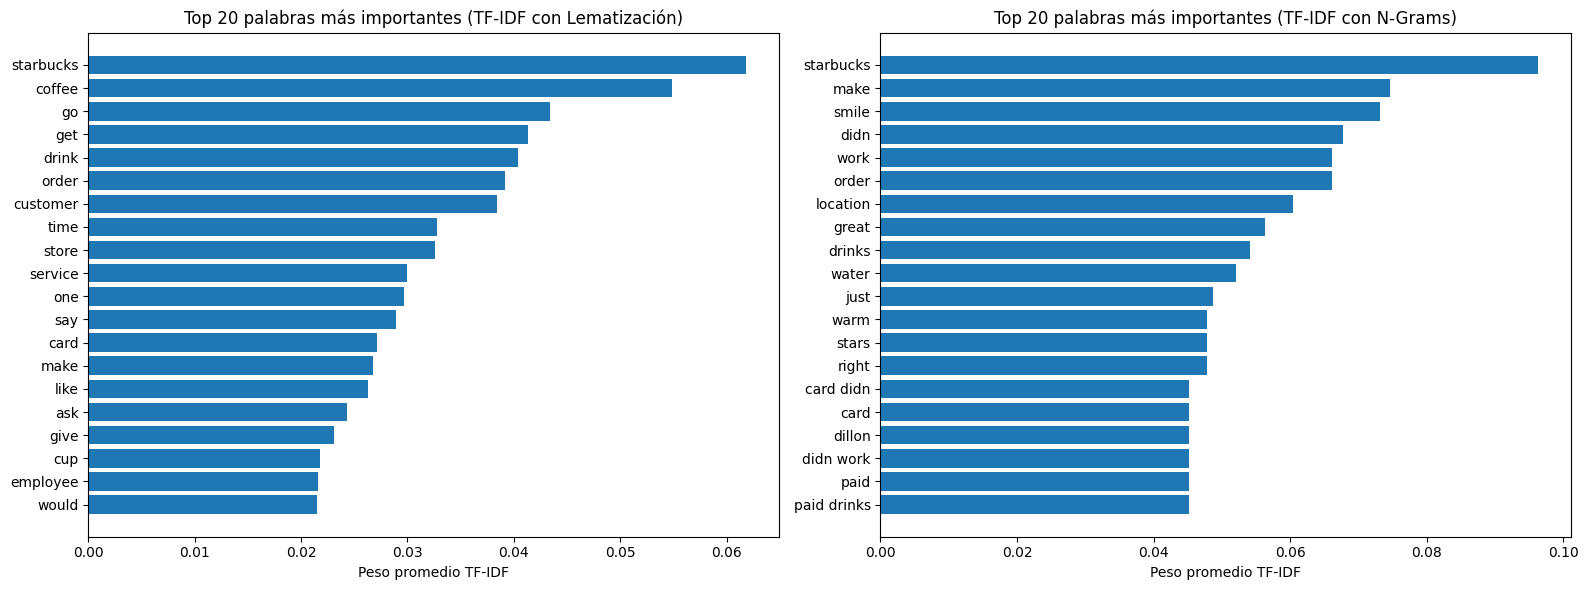

In [310]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Gráfico TF-IDF con Lematización
axes[0].barh(top_words_df['palabra'][::-1], top_words_df['peso_tfidf'][::-1])
axes[0].set_title("Top 20 palabras más importantes (TF-IDF con Lematización)")
axes[0].set_xlabel("Peso promedio TF-IDF")

# Gráfico TF-IDF con N-Grams
axes[1].barh(top_words_df1['palabra'][::-1], top_words_df1['peso_tfidf'][::-1])
axes[1].set_title("Top 20 palabras más importantes (TF-IDF con N-Grams)")
axes[1].set_xlabel("Peso promedio TF-IDF")

plt.tight_layout()
plt.show()

Observación: En ambos casos, TF-IDF con lematización o con N-Grams, coinciden algunas de las palabras utilizadas, lo que es notable es la diferencia entre los pesos que se asignan a cada una de ellas, siendo los pesos de TF-IDF con N-Grams mucho mayores.

In [311]:
# Bag of Words
count_vectorizer = CountVectorizer(max_features=1000)
X_counts = count_vectorizer.fit_transform(texts)

# Suma de ocurrencias
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()

# Top 20 de palabras más frecuentes
top_indices_counts = word_counts.argsort()[::-1][:20]
top_words_counts = [(count_vectorizer.get_feature_names_out()[i], word_counts[i])
                    for i in top_indices_counts]

top_counts_df = pd.DataFrame(top_words_counts, columns=['palabra', 'frecuencia'])
print(top_counts_df)

      palabra  frecuencia
0   starbucks        1059
1      coffee         619
2          go         540
3         get         473
4       order         410
5    customer         409
6       drink         386
7        time         335
8         say         316
9       store         312
10        one         293
11    service         265
12       make         241
13        ask         230
14       like         230
15       card         229
16       give         214
17       tell         200
18      would         200
19       take         182


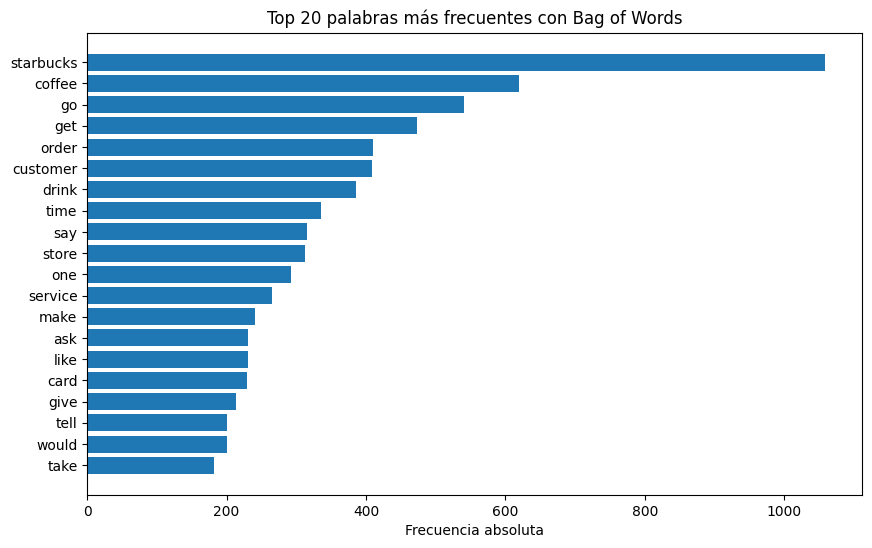

In [312]:
# Gráfico
plt.figure(figsize=(10,6))
plt.barh(top_counts_df['palabra'][::-1], top_counts_df['frecuencia'][::-1])
plt.xlabel("Frecuencia absoluta")
plt.title("Top 20 palabras más frecuentes con Bag of Words")
plt.show()

## Análisis de Sentimientos con VADER

In [313]:
# Inicialización del analizador
sia = SentimentIntensityAnalyzer()

# Aplicación sobre la columna limpia
df['sentiment_scores'] = df['tokens_lemma'].apply(lambda x: sia.polarity_scores(' '.join(x))) # Join tokens into a string

# Extracción del compound (polaridad global de la reseña)
df['sentiment_compound'] = df['sentiment_scores'].apply(lambda d: d['compound'])

# Clasificación de las reseñas en positivo, neutro y negativo
def label_sentiment(score):
    if score >= 0.05:
        return 'positivo'
    elif score <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

df['sentiment_label'] = df['sentiment_compound'].apply(label_sentiment)

df[['tokens_lemma', 'sentiment_compound', 'sentiment_label']].head(10)

,tokens_lemma,sentiment_compound,sentiment_label
0,"[amber, ladonna, starbucks, southwest, parkway...",0.8779,positivo
1,"[starbucks, fire, station, altamonte, spring, ...",0.9705,positivo
2,"[want, go, way, recognize, starbucks, employee...",0.3182,positivo
3,"[friend, starbucks, card, work, thankful, work...",0.9578,positivo
4,"[kick, drinking, cup, warm, water, work, insta...",0.9631,positivo
5,"[correct, order, time, never, get, right, mana...",-0.8316,negativo
6,"[tried, starbucks, several, different, time, d...",0.1531,positivo
7,"[starbucks, near, launch, new, fall, food, bev...",0.8555,positivo
8,"[order, online, reisterstown, rd, st, thomas, ...",-0.8481,negativo
9,"[staff, smythe, st, superstore, location, fred...",-0.5729,negativo


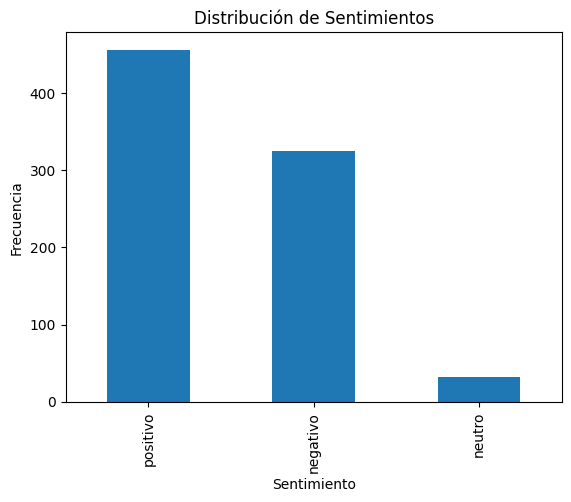

In [314]:
# Gráfico
df['sentiment_label'].value_counts().plot(kind='bar')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentimientos')
plt.show()

Observación: Según el analizador, se presenta un elevado número de reseñas con sentimiento positivo.

### Análisis del rating con el sentimiento calculado por VADER

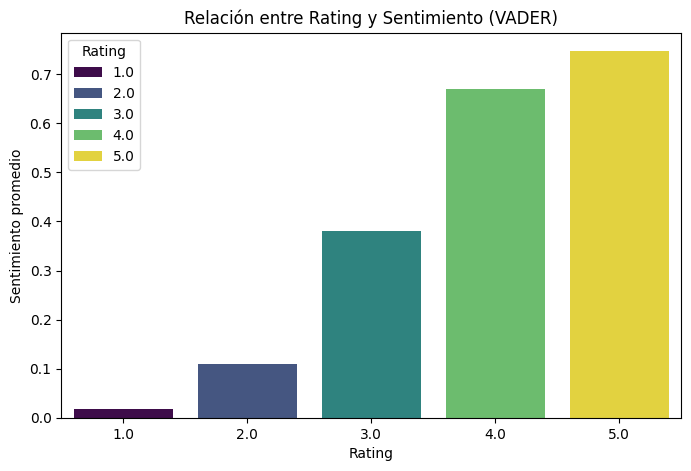

In [315]:
# Conversión de rating a numérico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Promedio de sentimiento por rating
rating_sentiment = df.groupby('Rating')['sentiment_compound'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Rating', y='sentiment_compound', data=rating_sentiment, palette="viridis", hue='Rating')
plt.title("Relación entre Rating y Sentimiento (VADER)")
plt.ylabel("Sentimiento promedio")
plt.xlabel("Rating")
plt.show()

Observación: Se tiene un elevado sentimiento positivo.

## Polaridad de frases con TextBlob

In [316]:
# Análisis de polaridad y subjetividad de las reseñas
df['polarity'] = df['tokens_lemma'].apply(lambda x: TextBlob(" ".join(x)).sentiment.polarity)
df['subjectivity'] = df['tokens_lemma'].apply(lambda x: TextBlob(" ".join(x)).sentiment.subjectivity)

df[['tokens_lemma', 'polarity', 'subjectivity']].head(10)

,tokens_lemma,polarity,subjectivity
0,"[amber, ladonna, starbucks, southwest, parkway...",0.314286,0.305952
1,"[starbucks, fire, station, altamonte, spring, ...",0.370370,0.662037
2,"[want, go, way, recognize, starbucks, employee...",-0.240000,0.453333
3,"[friend, starbucks, card, work, thankful, work...",0.333333,0.466667
4,"[kick, drinking, cup, warm, water, work, insta...",0.396561,0.611376
5,"[correct, order, time, never, get, right, mana...",-0.071429,0.511905
6,"[tried, starbucks, several, different, time, d...",0.000000,0.400000
7,"[starbucks, near, launch, new, fall, food, bev...",0.230303,0.475084
8,"[order, online, reisterstown, rd, st, thomas, ...",-0.500000,0.900000
9,"[staff, smythe, st, superstore, location, fred...",-0.136111,0.705556


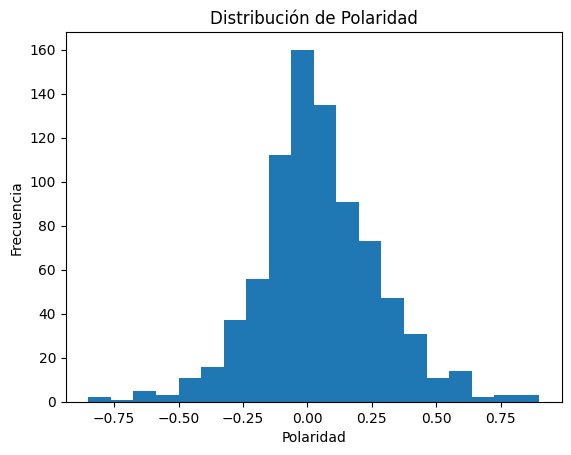

polarity
 0.000000    38
 0.300000     8
 0.100000     7
 0.150000     7
 0.600000     5
             ..
-0.075000     1
 0.023214     1
 0.220000     1
-0.112500     1
-0.016548     1
Name: count, Length: 652, dtype: int64


In [317]:
# Gráfico
df['polarity'].plot(kind='hist', bins=20)
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Polaridad')
plt.show()

x = df['polarity'].value_counts()
print(x)

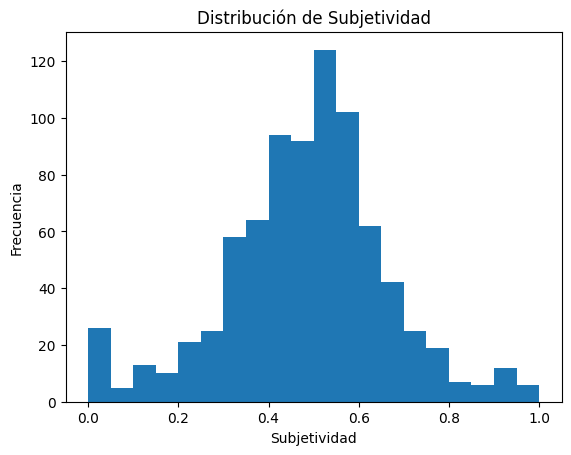

subjectivity
0.000000    21
0.500000    14
0.400000    11
0.600000    10
0.900000     8
            ..
0.436752     1
0.563333     1
0.687500     1
0.618000     1
0.581250     1
Name: count, Length: 631, dtype: int64


In [318]:
# Gráfico
df['subjectivity'].plot(kind='hist', bins=20)
plt.xlabel('Subjetividad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Subjetividad')
plt.show()

x = df['subjectivity'].value_counts()
print(x)

# Análisis de sentipientos con SpaCy

In [319]:
# Cargar el modelo de SpaCy
nlp = spacy.load('en_core_web_md')

In [320]:
# Renombrar la columna 'Rating' a 'Score'
df.rename(columns={'Rating': 'Score'}, inplace=True)

## Creación de la variable objetivo

In [321]:
df['Score'] = df['Score'].astype(float).astype(int)

In [322]:
# Mapeo de los scores a sentimiento binario
df['Sentiment_rating'] = df['Score'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else -1))

# Eliminación de las reseñas neutrales (Score = 3)
df_model = df[df['Sentiment_rating'] != -1].copy()

print("Distribución de Sentimientos (0=Negativo, 1=Positivo):")
print(df_model['Sentiment_rating'].value_counts())

Distribución de Sentimientos (0=Negativo, 1=Positivo):
Sentiment_rating
0    658
1    122
Name: count, dtype: int64


## Preprocesamiento de Texto

In [323]:
# Creación de una lista de signos de puntuación y stop words
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Función de preprocesamiento usando SpaCy
def spacy_preprocessor(text):
    # Creación de un objeto Doc de SpaCy
    doc = nlp(text)

    # Lematizar, convertir a minúsculas y eliminar stop words y puntuación
    filtered_tokens = []
    for token in doc:
        # Si el token no es una stop word ni un signo de puntuación
        if not token.is_stop and not token.is_punct:
            # Lematización y conversión a minúsculas
            filtered_tokens.append(token.lemma_.lower())

    # Unión de los tokens de nuevo en una cadena de texto
    return " ".join(filtered_tokens)

In [324]:
# Aplicación de la función a la columna de reseñas
df_model['processed_text'] = df_model['Review'].apply(spacy_preprocessor)

print("\nEjemplo de preprocesamiento:")
print("Texto Original:\n", df_model['Review'].iloc[2])
print("\nTexto Procesado:\n", df_model['processed_text'].iloc[2])


Ejemplo de preprocesamiento:
Texto Original:
 I just wanted to go out of my way to recognize a Starbucks employee Billy at the Franklin Park location! I was running late to work & placed an order at the wrong location and not only did he make my order with a smile he made it within 60 seconds! Thank you SOO much I was having a bad morning and people like you just make this world a better place.

Texto Procesado:
 want way recognize starbucks employee billy franklin park location run late work place order wrong location order smile 60 second thank soo have bad morning people like world well place


## Selección de variables y división de los datos

In [325]:
X = df_model['processed_text']
y = df_model['Sentiment_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Metodología 1: Bag of Words (BoW)

In [326]:
# Creación de un pipeline que vectoriza el texto y entrena el clasificador
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))), # Uso de unigramas y bigramas
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenamiento del pipeline
bow_pipeline.fit(X_train, y_train)

# Predicción
y_pred_bow = bow_pipeline.predict(X_test)

In [327]:
# Evaluación del modelo
print("Resultados con Bag of Words (BoW):")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bow))

Resultados con Bag of Words (BoW):
Accuracy: 0.9102564102564102

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       132
           1       0.92      0.46      0.61        24

    accuracy                           0.91       156
   macro avg       0.91      0.73      0.78       156
weighted avg       0.91      0.91      0.90       156



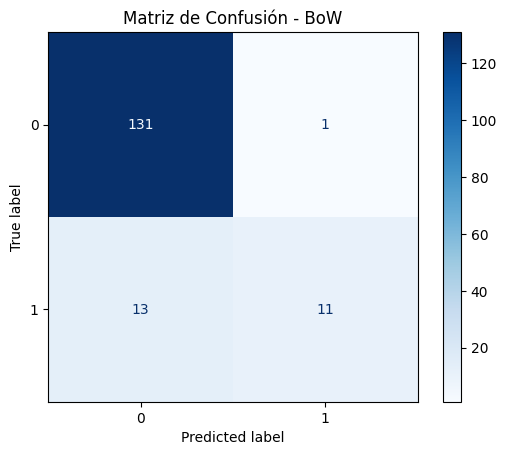

In [328]:
# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bow, cmap='Blues')
plt.title('Matriz de Confusión - BoW')
plt.show()

## Metodología 2: TF-IDF

In [329]:
# Creación del pipeline
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))), # Con unigramas y bigramas
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenamiento del pipeline
tfidf_pipeline.fit(X_train, y_train)

# Predicciones
y_pred_tfidf = tfidf_pipeline.predict(X_test)

In [330]:
# Evaluación del modelo
print("Resultados con TF-IDF:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))

Resultados con TF-IDF:
Accuracy: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       132
           1       0.00      0.00      0.00        24

    accuracy                           0.85       156
   macro avg       0.42      0.50      0.46       156
weighted avg       0.72      0.85      0.78       156



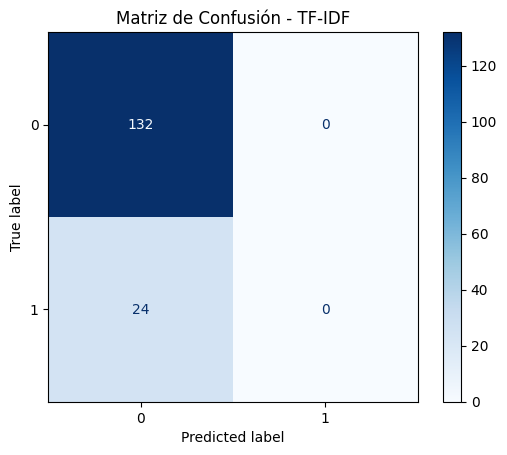

In [331]:
# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tfidf, cmap='Blues')
plt.title('Matriz de Confusión - TF-IDF')
plt.show()

## Metodología 3: Word Embeddings (Vectores de SpaCy)

In [332]:
# Obtención de vectores para el conjuntos de entrenamiento y prueba
X_train_vectors = np.array([nlp(text).vector for text in X_train])
X_test_vectors = np.array([nlp(text).vector for text in X_test])

In [333]:
# Creación y entrenamiento del modelo de Regresión Logística con los vectores
vector_classifier = LogisticRegression(max_iter=1000)
vector_classifier.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=1000)

In [334]:
# Predicciones
y_pred_vectors = vector_classifier.predict(X_test_vectors)

In [335]:
# Evaluación del modelo
print("Resultados con Word Embeddings (SpaCy):")
print("Accuracy:", accuracy_score(y_test, y_pred_vectors))
print("\nClassification Report:\n", classification_report(y_test, y_pred_vectors))

Resultados con Word Embeddings (SpaCy):
Accuracy: 0.9102564102564102

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       132
           1       1.00      0.42      0.59        24

    accuracy                           0.91       156
   macro avg       0.95      0.71      0.77       156
weighted avg       0.92      0.91      0.89       156



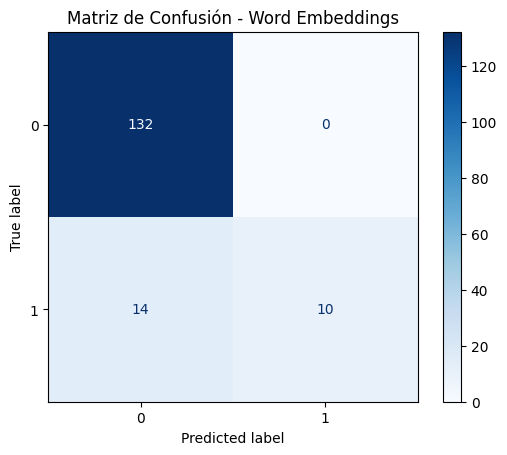

In [336]:
# Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_vectors, cmap='Blues')
plt.title('Matriz de Confusión - Word Embeddings')
plt.show()

## Comparación entre metodologías

### Resultados

| Metodología | Accuracy | Precisión (Positivo) | Recall (Positivo) | F1-Score (Positivo) |
| :--- | :--- | :--- | :--- | :--- |
| Bag of Words | 0.91 | 0.92 | 0.46 | 0.61 |
| TF-IDF | 0.85 | 0.00 | 0.00 | 0.00 |
| Word Embeddings | 0.91 | 1.00 | 0.42 | 0.59 |

### Análisis:
* BoW presenta un buen accuracy en la clasificación de las reseñas, una precisión buena de los rating positivos y un recall bajo de dichas reseñas positivas.

* TF-IDF no supera a BoW en sus ponderación, a pesar de su capacidad para identificar palabras. Presenta una accuracy buena pero no tiene precisión, recall y F1-Score.

* Word Embeddings con un modelo de Regresión Logística presenta un buen accuracy y precisión de las reseñas positivas pero un bajo recall, puede que no logre capturar toda la riqueza de estos vectores.

* El dataset presenta desbalance de clases, por lo que el Recall para la clase positiva (1) es una métrica que indica qué porcentaje de las reseñas realmente positivas fueron capaces de ser identificadas. En los tres casos, se presenta un bajo o nulo recall de reseñas positivas, lo que estaría ignorando a los clientes satisfechos.

## Palabras más frecuentes por rating

In [337]:
# Función para contar las palabras más frecuentes
def get_pos_words(texts, pos_filter=["NOUN","ADJ"], top_n=10):
    words = []
    for text in texts:
        doc = nlp(str(text))
        words.extend([token.lemma_.lower() for token in doc if token.pos_ in pos_filter and not token.is_stop])
    return Counter(words).most_common(top_n)

# Top de palabras en reseñas con rating 5
top_words_rating5 = get_pos_words(df_model[df_model['Score']==5]['processed_text'])
print("Top palabras en rating 5:", top_words_rating5)

# Top de palabras en reseñas con rating 1
top_words_rating1 = get_pos_words(df_model[df_model['Score']==1]['processed_text'])
print("Top palabras en rating 1:", top_words_rating1)

Top palabras en rating 5: [('starbuck', 68), ('coffee', 53), ('great', 37), ('service', 35), ('customer', 33), ('good', 31), ('store', 25), ('order', 21), ('drink', 19), ('time', 17)]
Top palabras en rating 1: [('starbuck', 648), ('coffee', 417), ('customer', 301), ('order', 296), ('time', 231), ('drink', 205), ('store', 196), ('card', 188), ('service', 160), ('manager', 123)]


# Conclusión

## **Conclusión general**

* Se logró obtener un corpus limpio y estandarizado, con palabras normalizadas mediante lematización y sin ruido lingüístico gracias a la eliminación de stopwords.

* El análisis de frecuencia de palabras mostraró términos clave que describen las experiencias de los clientes.

* La representación vectorial mediante TF-IDF permitiró destacar palabras con mayor relevancia en el contexto de las reseñas, diferenciando comentarios positivos y negativos.

* El análisis de sentimiento reflejó una correlación con los ratings: reseñas con baja calificación tendrán predominancia de polaridad negativa, mientras que reseñas con calificaciones altas se asociarán a polaridad positiva.

* Con SpaCy, se identificaron patrones en los sustantivos y adjetivos más frecuentes que aporten información semántica relevante, lo que permitirá comprender mejor las áreas de satisfacción e insatisfacción de los consumidores.

## **Conclusión final**

El presente proyecto demuestra cómo las técnicas de preprocesamiento de texto y análisis NLP pueden transformar un conjunto de reseñas no estructuradas en información organizada y útil para la toma de decisiones empresariales.

El uso combinado de TF-IDF, análisis de frecuencia, análisis de sentimiento y SpaCy permite obtener no solo una visión cuantitativa de las palabras más relevantes, sino también una interpretación cualitativa del lenguaje empleado por los clientes.

La comparación entre los sentimientos expresados en las reseñas y los ratings otorgados proporciona un marco confiable para validar la percepción de los consumidores. Asimismo, la extracción de sustantivos y adjetivos clave revela las dimensiones más valoradas (positiva o negativamente) por los clientes, aportando información de gran utilidad para la gestión de la experiencia de marca.

En conjunto, los resultados obtenidos sientan las bases para futuros desarrollos de clasificación automática de reseñas, minería de opiniones y sistemas de recomendación personalizados, consolidando al NLP como una herramienta estratégica en la industria alimentaria y de servicios.